<a href="https://colab.research.google.com/github/Pitchara/Data-Analyst-Project/blob/main/Shaft_Centerline_of_Centrifugal_Compressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Centrifugal Compressor Shaft Centerline on 19 Feb to 27 Mar'25




As a mechanical engineer, I assess the health of centrifugal compressors by exporting gap voltage data from proximity transducers and plotting the shaft centerline using the following code.

                 Time  NDECOMP_X-Gap  NDECOMP_Y-Gap  DECOMP_X-Gap  \
0 2025-02-19 01:46:23     -10.010690      -9.677601    -10.105301   
1 2025-02-19 01:46:24     -10.010692      -9.677606    -10.105307   
2 2025-02-19 01:46:25     -10.010688      -9.677528    -10.105310   
3 2025-02-19 01:46:26     -10.010677      -9.677515    -10.105305   
4 2025-02-19 01:46:27     -10.010673      -9.677541    -10.105309   

   DECOMP_Y-Gap  DEHSGB_X-Gap  DEHSGB_Y-Gap  NDEHSGB_X-Gap  NDEHSGB_Y-Gap  \
0     -9.861394     -9.092952     -9.255781      -8.686957      -8.945277   
1     -9.861475     -9.092949     -9.255813      -8.686820      -8.945330   
2     -9.861474     -9.093013     -9.255770      -8.686705      -8.945365   
3     -9.861465     -9.092991     -9.255779      -8.686678      -8.945376   
4     -9.861379     -9.092982     -9.255767      -8.686592      -8.945407   

   DELSGB_X-Gap  ...  DECOMP_X_microns  DECOMP_Y_microns  DEHSGB_X_microns  \
0     -9.964381  ...          0.000000      

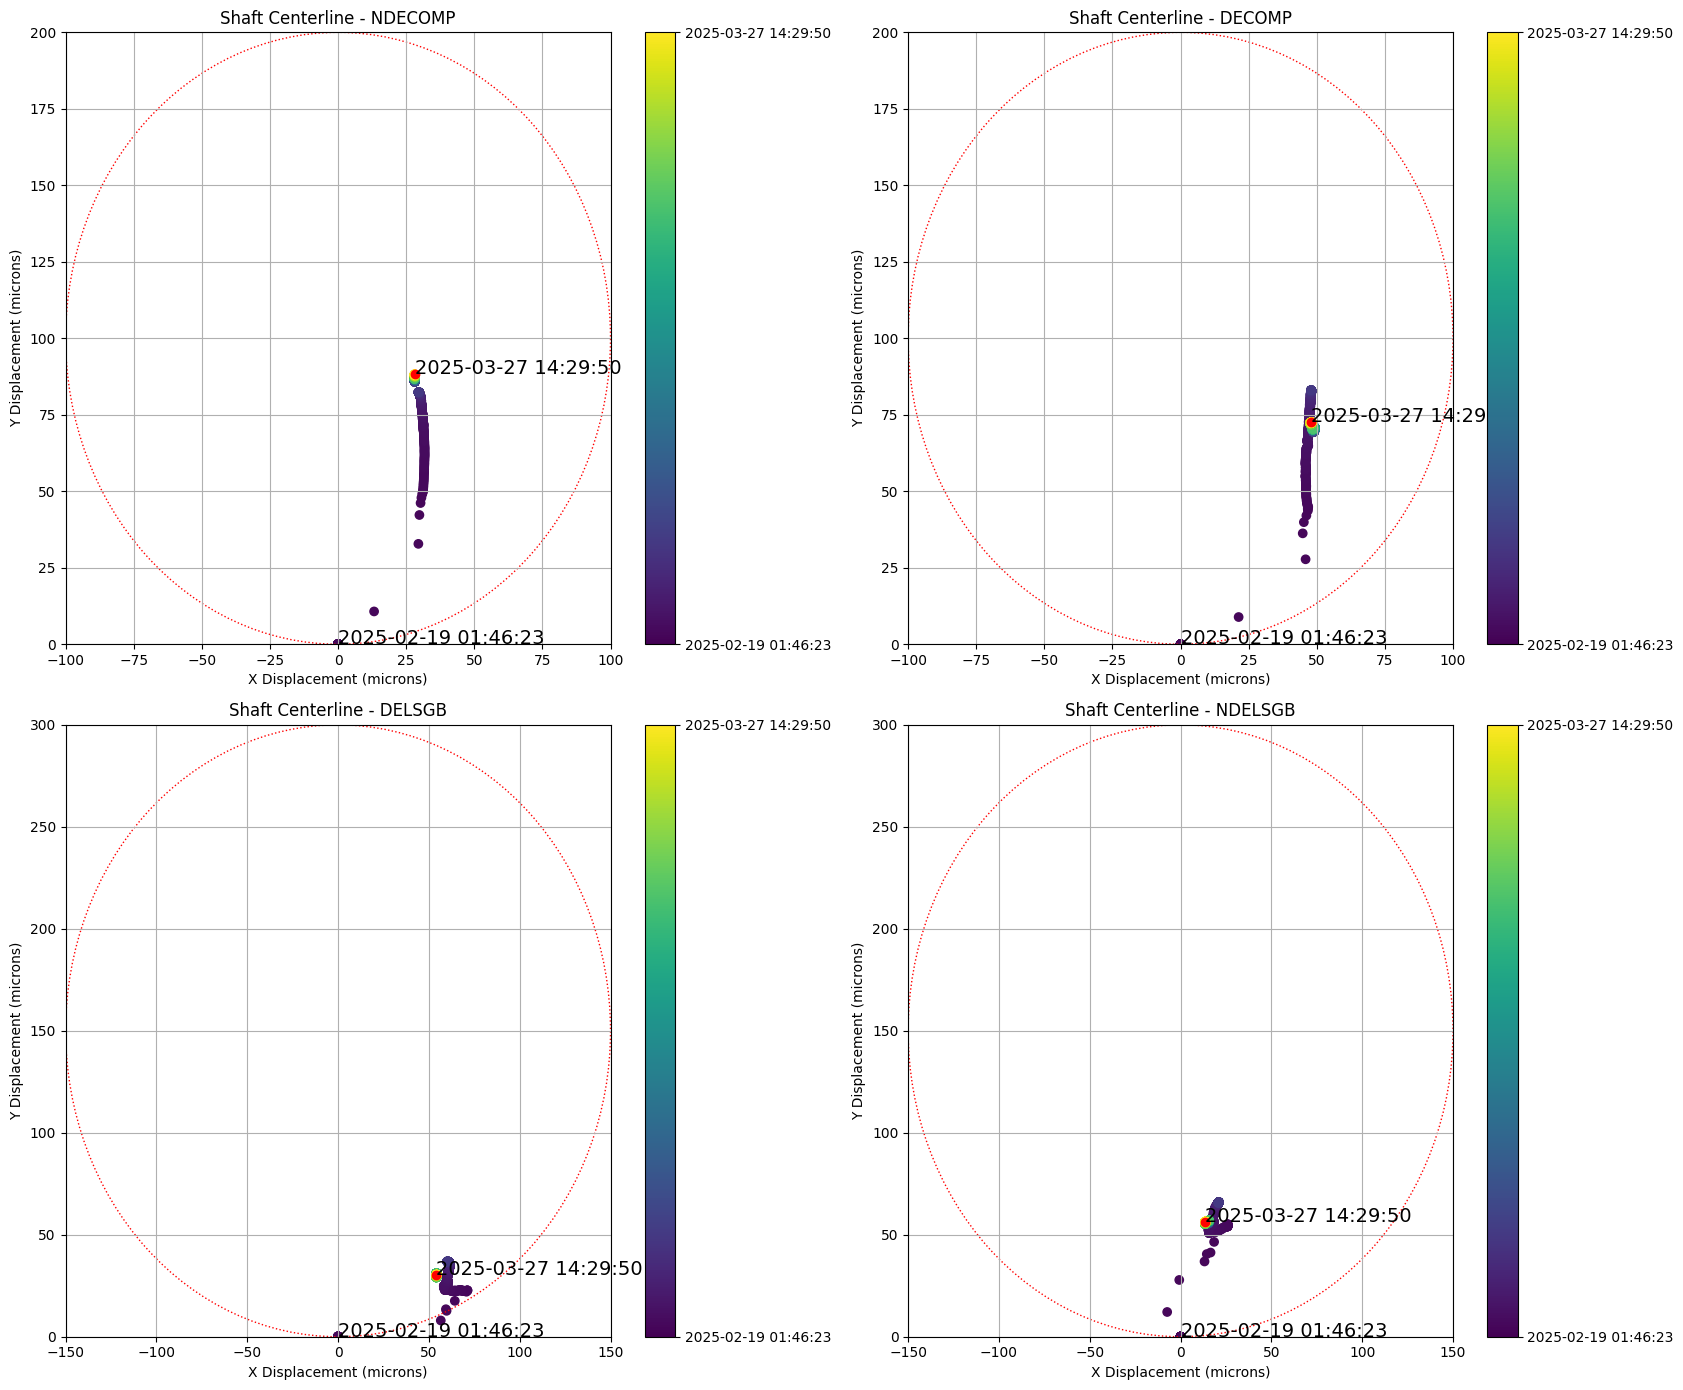

88.17181304315199
72.5498745368109


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates

# Load the xlsx file
file_path = r"/content/drive/MyDrive/Shaft Centerline of centrifugal compressor.xlsx"


# Read the Excel file
df = pd.read_excel(file_path)

#print(df.head())

# Conversion factor and angle correction
conversion_factor = 7.87 / 1000
angle_correction = np.sqrt(2)



# Initial (origin) gap voltages for all parameters
initial_NDECOMP_X_voltage = df['NDECOMP_X-Gap'].iloc[0]
initial_NDECOMP_Y_voltage = df['NDECOMP_Y-Gap'].iloc[0]

initial_DECOMP_X_voltage = df['DECOMP_X-Gap'].iloc[0]
initial_DECOMP_Y_voltage = df['DECOMP_Y-Gap'].iloc[0]

initial_DEHSGB_X_voltage = df['DEHSGB_X-Gap'].iloc[0]
initial_DEHSGB_Y_voltage = df['DEHSGB_Y-Gap'].iloc[0]

initial_NDEHSGB_X_voltage = df['NDEHSGB_X-Gap'].iloc[0]
initial_NDEHSGB_Y_voltage = df['NDEHSGB_Y-Gap'].iloc[0]

initial_NDELSGB_X_voltage = df['NDELSGB_X-Gap'].iloc[0]
initial_NDELSGB_Y_voltage = df['NDELSGB_Y-Gap'].iloc[0]

initial_DELSGB_X_voltage = df['DELSGB_X-Gap'].iloc[0]
initial_DELSGB_Y_voltage = df['DELSGB_Y-Gap'].iloc[0]


def rotate_coordinates(x, y, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    # Apply the rotation matrix
    x_rotated = x * cos_theta - y * sin_theta
    y_rotated = x * sin_theta + y * cos_theta
    return x_rotated, y_rotated


# Normalize the data by subtracting the initial values
df['NDECOMP_X_normalized'] = df['NDECOMP_X-Gap'] - initial_NDECOMP_X_voltage
df['NDECOMP_Y_normalized'] = df['NDECOMP_Y-Gap'] - initial_NDECOMP_Y_voltage

df['DECOMP_X_normalized'] = df['DECOMP_X-Gap'] - initial_DECOMP_X_voltage
df['DECOMP_Y_normalized'] = df['DECOMP_Y-Gap'] - initial_DECOMP_Y_voltage

df['DEHSGB_X_normalized'] = df['DEHSGB_X-Gap'] - initial_DEHSGB_X_voltage
df['DEHSGB_Y_normalized'] = df['DEHSGB_Y-Gap'] - initial_DEHSGB_Y_voltage

df['NDEHSGB_X_normalized'] = df['NDEHSGB_X-Gap'] - initial_NDEHSGB_X_voltage
df['NDEHSGB_Y_normalized'] = df['NDEHSGB_Y-Gap'] - initial_NDEHSGB_Y_voltage

df['NDELSGB_X_normalized'] = df['NDELSGB_X-Gap'] - initial_NDELSGB_X_voltage
df['NDELSGB_Y_normalized'] = df['NDELSGB_Y-Gap'] - initial_NDELSGB_Y_voltage

df['DELSGB_X_normalized'] = df['DELSGB_X-Gap'] - initial_DELSGB_X_voltage
df['DELSGB_Y_normalized'] = df['DELSGB_Y-Gap'] - initial_DELSGB_Y_voltage



# Calculate Actual Coordinate

## NDE Comp
NDECOMP_x_rot, NDECOMP_y_rot = rotate_coordinates(df['NDECOMP_X_normalized'], df['NDECOMP_Y_normalized'], 45)
df['NDECOMP_X_microns'] = NDECOMP_x_rot / conversion_factor
df['NDECOMP_Y_microns'] = NDECOMP_y_rot / conversion_factor

## DE Comp
DECOMP_x_rot, DECOMP_y_rot = rotate_coordinates(df['DECOMP_X_normalized'], df['DECOMP_Y_normalized'], 45)
df['DECOMP_X_microns'] = DECOMP_x_rot / conversion_factor
df['DECOMP_Y_microns'] = DECOMP_y_rot / conversion_factor

## HS GB
DEHSGB_x_rot, DEHSGB_y_rot = rotate_coordinates(df['DEHSGB_X_normalized'], df['DEHSGB_Y_normalized'], 45)
df['DEHSGB_X_microns'] = DEHSGB_x_rot / conversion_factor
df['DEHSGB_Y_microns'] = DEHSGB_y_rot / conversion_factor

NDEHSGB_x_rot, NDEHSGB_y_rot = rotate_coordinates(df['NDEHSGB_X_normalized'], df['NDEHSGB_Y_normalized'], 45)
df['NDEHSGB_X_microns'] = NDEHSGB_x_rot / conversion_factor
df['NDEHSGB_Y_microns'] = NDEHSGB_y_rot / conversion_factor

## LS GB
NDELSGB_x_rot, NDELSGB_y_rot = rotate_coordinates(df['NDELSGB_X_normalized'], df['NDELSGB_Y_normalized'], 45)
df['NDELSGB_X_microns'] = NDELSGB_x_rot / conversion_factor
df['NDELSGB_Y_microns'] = NDELSGB_y_rot / conversion_factor

DELSGB_x_rot, DELSGB_y_rot = rotate_coordinates(df['DELSGB_X_normalized'], df['DELSGB_Y_normalized'], 45)
df['DELSGB_X_microns'] = DELSGB_x_rot / conversion_factor
df['DELSGB_Y_microns'] = DELSGB_y_rot / conversion_factor


print(df.head())




# Extract month and year from Time column
####df['Month_Year'] = pd.to_datetime(df['Time']).dt.strftime('   %b %Y')
df['Month_Year'] = pd.to_datetime(df['Time'])

#formatted_labels = [
#    df['Month_Year'].iloc[0].strftime('%d-%b-%Y %H:%M'),
#    df['Month_Year'].iloc[-1].strftime('%d-%b-%Y %H:%M')
#]


# Get the color map
colors = cm.viridis(np.linspace(0, 1, len(df)))

# Plotting the shaft centerline for NDE, DE, LS, and HS
plt.figure(figsize=(17, 14))

# Add dotted circular line with 310 µm diameter
circle = plt.Circle((0, 100), 200/2, color='r', linestyle=':', fill=False)

# NDECOMP plot
plt.subplot(2, 2, 1)
sc1 = plt.scatter(df['NDECOMP_X_microns'],df['NDECOMP_Y_microns'], c=range(len(df)), cmap='viridis')
plt.text(df['NDECOMP_X_microns'].iloc[-1], df['NDECOMP_Y_microns'].iloc[-1], df['Month_Year'].iloc[-1], fontsize=14)  # display last recoriding date
plt.text(df['NDECOMP_X_microns'].iloc[0], df['NDECOMP_Y_microns'].iloc[0], df['Month_Year'].iloc[0], fontsize=14)  # display first recoriding date
plt.scatter(df['NDECOMP_X_microns'].iloc[-1], df['NDECOMP_Y_microns'].iloc[-1], c='red')  # display last recoriding in red dot
plt.xlabel('X Displacement (microns)')
plt.ylabel('Y Displacement (microns)')
plt.title('Shaft Centerline - NDECOMP')
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([0, 200])
plt.gca().add_patch(plt.Circle((0, 100), 200/2, color='r', linestyle=':', fill=False))
cbar1 = plt.colorbar(sc1, ticks=[0, len(df)-1])
#cbar1.ax.set_yticklabels(formatted_labels)
cbar1.ax.set_yticklabels([df['Month_Year'].iloc[0], df['Month_Year'].iloc[-1]])


# DECOMP plot
plt.subplot(2, 2, 2)
sc2 = plt.scatter(df['DECOMP_X_microns'], df['DECOMP_Y_microns'], c=range(len(df)), cmap='viridis')
plt.text(df['DECOMP_X_microns'].iloc[-1], df['DECOMP_Y_microns'].iloc[-1], df['Month_Year'].iloc[-1], fontsize=14)  # Use rotated columns
plt.text(df['DECOMP_X_microns'].iloc[0], df['DECOMP_Y_microns'].iloc[0], df['Month_Year'].iloc[0], fontsize=14)  # display first recoriding date
plt.scatter(df['DECOMP_X_microns'].iloc[-1], df['DECOMP_Y_microns'].iloc[-1], c='red')  # Use rotated columns
plt.xlabel('X Displacement (microns)')
plt.ylabel('Y Displacement (microns)')
plt.title('Shaft Centerline - DECOMP')
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([0, 200])
plt.gca().add_patch(plt.Circle((0, 100), 200/2, color='r', linestyle=':', fill=False))
cbar2 = plt.colorbar(sc2, ticks=[0, len(df)-1])
cbar2.ax.set_yticklabels([df['Month_Year'].iloc[0], df['Month_Year'].iloc[-1]])


# NDELSGB plot
plt.subplot(2, 2, 4)
sc3 = plt.scatter(df['NDELSGB_X_microns'], df['NDELSGB_Y_microns'], c=range(len(df)), cmap='viridis')
plt.text(df['NDELSGB_X_microns'].iloc[-1], df['NDELSGB_Y_microns'].iloc[-1], df['Month_Year'].iloc[-1], fontsize=14)  # Use rotated columns
plt.text(df['NDELSGB_X_microns'].iloc[0], df['NDELSGB_Y_microns'].iloc[0], df['Month_Year'].iloc[0], fontsize=14)  # display first recoriding date
plt.scatter(df['NDELSGB_X_microns'].iloc[-1], df['NDELSGB_Y_microns'].iloc[-1], c='red')  # Use rotated columns
plt.xlabel('X Displacement (microns)')
plt.ylabel('Y Displacement (microns)')
plt.title('Shaft Centerline - NDELSGB')
plt.grid(True)
plt.xlim([-150, 150])
plt.ylim([0, 300])
plt.gca().add_patch(plt.Circle((0, 150), 300/2, color='r', linestyle=':', fill=False))
cbar3 = plt.colorbar(sc3, ticks=[0, len(df)-1])
cbar3.ax.set_yticklabels([df['Month_Year'].iloc[0], df['Month_Year'].iloc[-1]])

# DELSGB plot
plt.subplot(2, 2, 3)
sc3 = plt.scatter(df['DELSGB_X_microns'], df['DELSGB_Y_microns'], c=range(len(df)), cmap='viridis')
plt.text(df['DELSGB_X_microns'].iloc[-1], df['DELSGB_Y_microns'].iloc[-1], df['Month_Year'].iloc[-1], fontsize=14)  # Use rotated columns
plt.text(df['DELSGB_X_microns'].iloc[0], df['DELSGB_Y_microns'].iloc[0], df['Month_Year'].iloc[0], fontsize=14)  # display first recoriding date
plt.scatter(df['DELSGB_X_microns'].iloc[-1], df['DELSGB_Y_microns'].iloc[-1], c='red')  # Use rotated columns
plt.xlabel('X Displacement (microns)')
plt.ylabel('Y Displacement (microns)')
plt.title('Shaft Centerline - DELSGB')
plt.grid(True)
plt.xlim([-150, 150])
plt.ylim([0, 300])
plt.gca().add_patch(plt.Circle((0, 150), 300/2, color='r', linestyle=':', fill=False))
cbar3 = plt.colorbar(sc3, ticks=[0, len(df)-1])
cbar3.ax.set_yticklabels([df['Month_Year'].iloc[0], df['Month_Year'].iloc[-1]])


plt.tight_layout()
plt.show()


print(df['NDECOMP_Y_microns'].iloc[-1])
print(df['DECOMP_Y_microns'].iloc[-1])

